In [1]:
import numpy as np
import warnings
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from prettytable import PrettyTable
from tqdm import tqdm

plt.style.use('default')
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize=10)
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

warnings.filterwarnings("ignore")

In [44]:
# Visualize learning rate evolution of Cosine Annealing after 1000 epochs with 1e-4 learning rate, decay step decay_steps = N / batch * epochs
N = 50000
batch = 128
epochs = 1000
decay_steps = N / batch * epochs
t = np.arange(0, epochs, 1)
lr = 1e-4 * 0.5 * (1 + np.cos(np.pi * t / decay_steps))

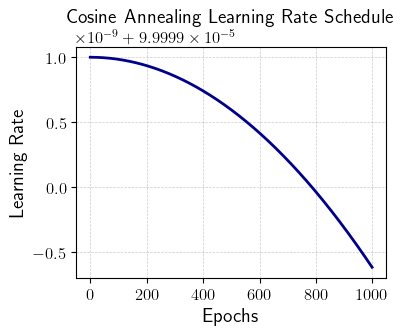

In [45]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(t, lr, color='darkblue', linewidth=2, label='Learning Rate')
ax.set_xlabel('Epochs')
ax.set_ylabel('Learning Rate')
ax.set_title('Cosine Annealing Learning Rate Schedule')
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.5, color='grey')
plt.savefig('./figures/cosine_annealing_lr_schedule.pdf', bbox_inches='tight')
plt.show()

In [36]:
# Visualize swish activation function
x = np.linspace(-2, 2, 100)
y = x / (1 + np.exp(-x))

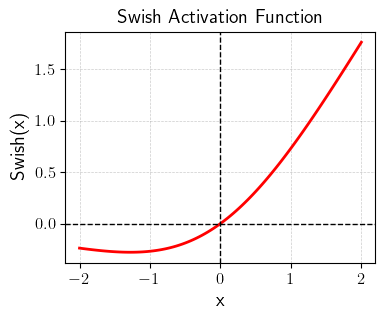

In [40]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(x, y, color='red', linewidth=2, label='Swish')
ax.axvline(0, color='black', linestyle='--', linewidth=1)
ax.axhline(0, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('x')
ax.set_ylabel('Swish(x)')
ax.set_title('Swish Activation Function')
ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.5, color='grey')
plt.savefig('./figures/swish_activation_function.pdf', bbox_inches='tight')
plt.show()

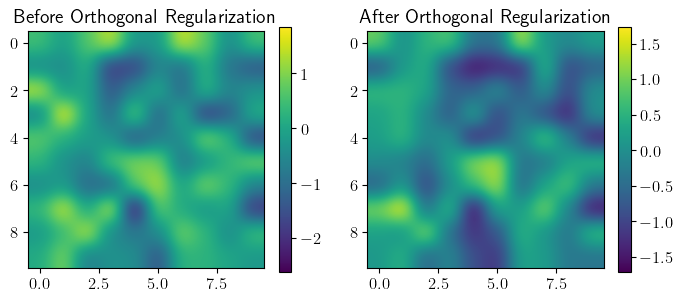

In [75]:
def orthogonal_regularizer(W, lmbda=1e-3):
    WWT = np.dot(W, W.T)
    I = np.eye(WWT.shape[0])
    return lmbda * np.linalg.norm(WWT - I, ord='fro')

def orthogonal_regularizer_grad(W, lmbda=1e-3):
    WWT = np.dot(W, W.T)
    I = np.eye(WWT.shape[0])
    return 2 * lmbda * (W @ (WWT - I))

np.random.seed(42)
W_initial = np.random.randn(10, 10)
W = np.copy(W_initial)
lr = 0.1
iterations = 1000
for _ in range(iterations):
    W -= lr * orthogonal_regularizer_grad(W)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
cax0 = ax[0].imshow(W_initial, cmap='viridis', interpolation='gaussian')
fig.colorbar(cax0, ax=ax[0])
ax[0].set_title('Before Orthogonal Regularization')

cax1 = ax[1].imshow(W, cmap='viridis', interpolation='gaussian')
fig.colorbar(cax1, ax=ax[1])
ax[1].set_title('After Orthogonal Regularization')

plt.tight_layout()
plt.show()

Orthogonality before: 35.8802, after: 30.2761


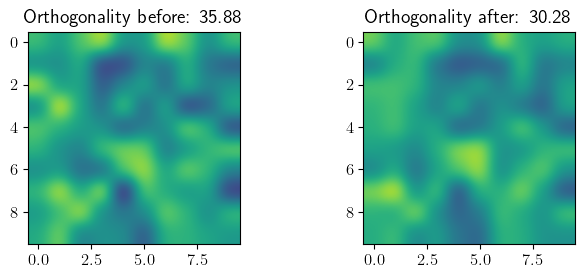

In [85]:
def measure_orthogonality(W):
    WWT = np.dot(W, W.T)
    I = np.eye(WWT.shape[0])
    return np.linalg.norm(WWT - I, ord='fro')

np.random.seed(42)
W_initial = np.random.randn(10, 10)
W = np.copy(W_initial)

lr = 1e-1
iterations = 100
for _ in range(iterations):
    W -= lr * orthogonal_regularizer_grad(W, lmbda=1e-2)

ortho_before = measure_orthogonality(W_initial)
ortho_after = measure_orthogonality(W)
print(f'Orthogonality before: {ortho_before:.4f}, after: {ortho_after:.4f}')

fig, ax = plt.subplots(1, 2, figsize=(7, 3))
vmin = min(W_initial.min(), W.min())
vmax = max(W_initial.max(), W.max())

ax[0].imshow(W_initial, cmap='viridis', interpolation='gaussian', vmin=vmin, vmax=vmax)
ax[0].set_title('Orthogonality before: {:.2f}'.format(ortho_before))
ax[1].imshow(W, cmap='viridis', interpolation='gaussian', vmin=vmin, vmax=vmax)
ax[1].set_title('Orthogonality after: {:.2f}'.format(ortho_after))
plt.tight_layout()
plt.show()